<a href="https://colab.research.google.com/github/Pam-Pam29/Formative-2-Multimodal-Data-Preprocessing/blob/main/Voiceprint_Complete_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voiceprint Verification - Complete Analysis

This notebook provides comprehensive:
1. Exploratory Data Analysis (EDA)
2. Model Training and Evaluation
3. Performance Metrics (Accuracy, Precision, Recall, F1-Score, Loss)


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, log_loss
)
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

## 2. Read Data


In [2]:
csv_path = r'https://raw.githubusercontent.com/Pam-Pam29/Formative-2-Multimodal-Data-Preprocessing/refs/heads/main/audio_features%20.csv'
df = pd.read_csv(csv_path)
df.head()


,file_id,speaker,audio_name,augmentation,audio_path,mfcc_mean_0,mfcc_std_0,mfcc_max_0,mfcc_min_0,mfcc_mean_1,...,chroma_mean_9,chroma_std_9,chroma_mean_10,chroma_std_10,chroma_mean_11,chroma_std_11,duration,sample_rate,max_amplitude,mean_amplitude
0,1,Pam,Pam_Confirm transaction,original,audio_files/Pam_Confirm transaction.wav,-354.71155,125.916405,-164.26454,-589.04340,86.001490,...,0.452131,0.278201,0.397025,0.291749,0.370353,0.305417,2.645333,48000,0.563415,0.043544
1,1,Pam,Pam_Confirm transaction,pitch_shift_up,audio_files/Pam_Confirm transaction.wav,-383.71915,126.196014,-201.16850,-608.92520,74.938770,...,0.436571,0.343078,0.457633,0.323268,0.417882,0.301396,2.645333,48000,0.523071,0.030442
2,1,Pam,Pam_Confirm transaction,pitch_shift_down,audio_files/Pam_Confirm transaction.wav,-396.58200,125.010574,-212.77580,-631.03436,91.131714,...,0.378569,0.306704,0.401508,0.345998,0.413870,0.366689,2.645333,48000,0.398560,0.028268
3,1,Pam,Pam_Confirm transaction,time_stretch_slow,audio_files/Pam_Confirm transaction.wav,-385.41556,123.019516,-208.29646,-602.77100,80.274430,...,0.527957,0.284170,0.454401,0.271440,0.418228,0.318869,2.939250,48000,0.378479,0.031639
4,1,Pam,Pam_Confirm transaction,time_stretch_fast,audio_files/Pam_Confirm transaction.wav,-385.83115,125.387180,-206.73343,-616.22560,83.641480,...,0.433550,0.268575,0.377162,0.308262,0.329577,0.280080,2.404854,48000,0.372681,0.030970


## 3. Shape of the Dataset


In [3]:
print("=" * 60)
print("DATASET SHAPE")
print("=" * 60)
print(f"Number of rows (samples): {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")
print(f"Total data points: {df.shape[0] * df.shape[1]:,}")
print(f"\nShape: {df.shape}")


DATASET SHAPE
Number of rows (samples): 54
Number of columns (features): 96
Total data points: 5,184

Shape: (54, 96)


## 4. Summary of the Dataset


In [4]:
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(df.describe())


SUMMARY STATISTICS
         file_id  mfcc_mean_0  mfcc_std_0  mfcc_max_0  mfcc_min_0  \
count  54.000000    54.000000   54.000000   54.000000   54.000000   
mean    3.500000  -416.766271   97.357339 -226.931872 -600.572837   
std     1.723861   104.518172   29.950701   89.277426  137.973199   
min     1.000000  -578.975950   16.452490 -391.207950 -796.523300   
25%     2.000000  -511.484400   82.383242 -295.545975 -718.938072   
50%     3.500000  -400.238700  104.632350 -208.416830 -616.540450   
75%     5.000000  -359.200350  122.603219 -164.593990 -554.143455   
max     6.000000  -221.941130  131.254680  -87.501840 -319.178740   

       mfcc_mean_1  mfcc_std_1  mfcc_max_1  mfcc_min_1  mfcc_mean_2  ...  \
count    54.000000   54.000000   54.000000   54.000000    54.000000  ...   
mean     84.233455   45.213893  188.255964  -12.543054    14.636513  ...   
std      32.548824    9.074689   41.037841   17.488107     6.985217  ...   
min       7.419573   18.943575   75.396350  -50.823166 

In [5]:
print("\n" + "=" * 60)
print("ADDITIONAL SUMMARY INFORMATION")
print("=" * 60)
print(f"Speakers: {df['speaker'].unique()}")
print(f"\nSpeaker distribution:")
print(df['speaker'].value_counts())
print(f"\nAugmentation types:")
print(df['augmentation'].value_counts())
print(f"\nUnique audio files: {df['audio_name'].nunique()}")



ADDITIONAL SUMMARY INFORMATION
Speakers: ['Pam' 'Rele' 'dennis']

Speaker distribution:
speaker
Pam       18
Rele      18
dennis    18
Name: count, dtype: int64

Augmentation types:
augmentation
original             6
pitch_shift_up       6
pitch_shift_down     6
time_stretch_slow    6
time_stretch_fast    6
noise_low            6
noise_high           6
speed_up             6
speed_down           6
Name: count, dtype: int64

Unique audio files: 6


## 5. Data Types


In [6]:
print("=" * 60)
print("DATA TYPES")
print("=" * 60)
print("\nData types summary:")
print(df.dtypes.value_counts())
print(f"\nDetailed data types:")
print(df.dtypes)


DATA TYPES

Data types summary:
float64    90
object      4
int64       2
Name: count, dtype: int64

Detailed data types:
file_id             int64
speaker            object
audio_name         object
augmentation       object
audio_path         object
                   ...   
chroma_std_11     float64
duration          float64
sample_rate         int64
max_amplitude     float64
mean_amplitude    float64
Length: 96, dtype: object


## 6. Check for Null Values


In [7]:
print("=" * 60)
print("NULL VALUES CHECK")
print("=" * 60)
null_counts = df.isnull().sum()
null_total = null_counts.sum()

if null_total > 0:
    print(f" Total null values: {null_total}")
    print("\nColumns with null values:")
    print(null_counts[null_counts > 0])
else:
    print(" No null values found in the dataset!")

NULL VALUES CHECK
 No null values found in the dataset!


## 7. Check for Duplicated Values


In [8]:
print("=" * 60)
print("DUPLICATED VALUES CHECK")
print("=" * 60)

duplicated_rows = df.duplicated().sum()
print(f"Completely duplicated rows: {duplicated_rows}")
duplicated_audio = df.duplicated(subset=['audio_name', 'augmentation']).sum()
print(f"Duplicated (audio_name + augmentation): {duplicated_audio}")

if duplicated_rows == 0 and duplicated_audio == 0:
    print("\n No duplicated values found!")
else:
    print(f"\n  Found {duplicated_rows} completely duplicated rows")
    print(f"  Found {duplicated_audio} duplicated audio-augmentation combinations")
    print("\nDuplicated rows:")
    print(df[df.duplicated(keep=False)])


DUPLICATED VALUES CHECK
Completely duplicated rows: 0
Duplicated (audio_name + augmentation): 0

 No duplicated values found!


## 8. Data Visualization

### 8.1 Speaker Distribution


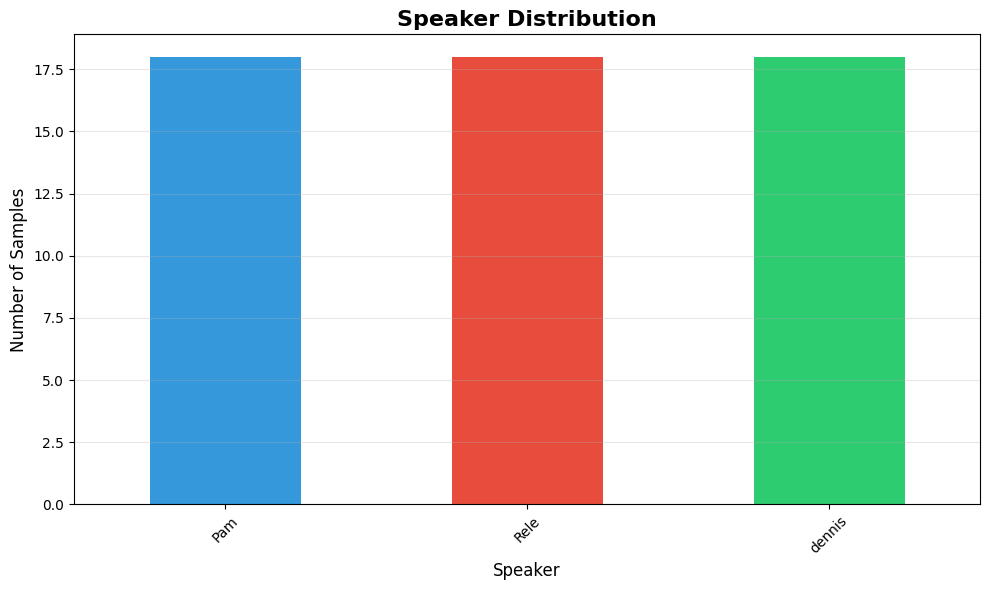

Speaker distribution:
speaker
Pam       18
Rele      18
dennis    18
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(10, 6))
speaker_counts = df['speaker'].value_counts()
speaker_counts.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Speaker Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Speaker', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Speaker distribution:\n{speaker_counts}")


### 8.2 Augmentation Distribution


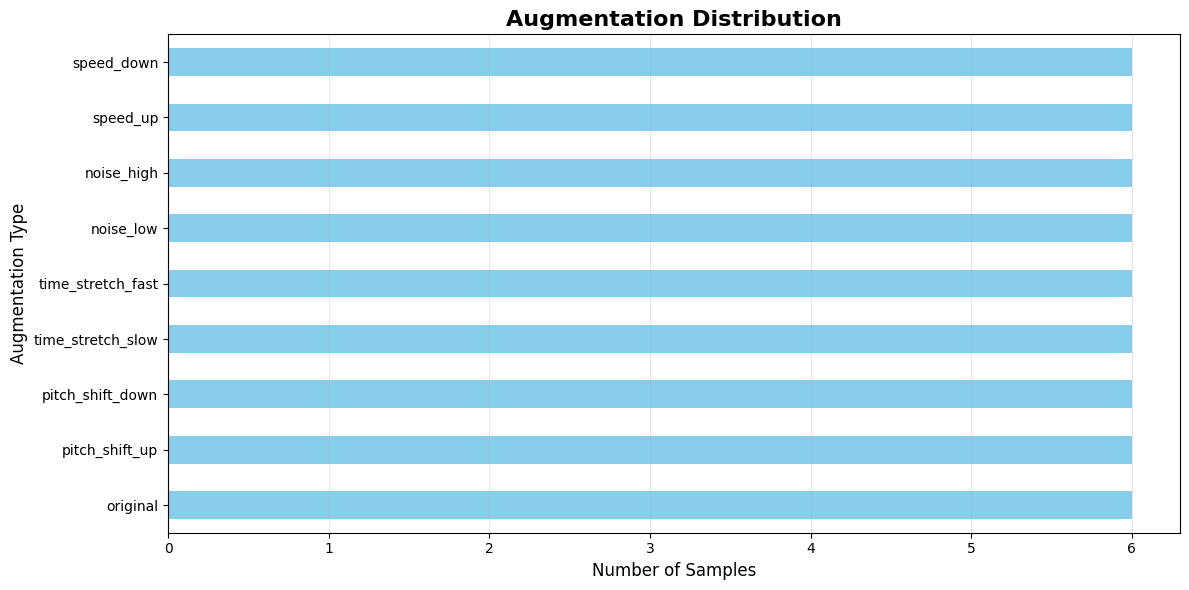

In [10]:
plt.figure(figsize=(12, 6))
aug_counts = df['augmentation'].value_counts()
aug_counts.plot(kind='barh', color='skyblue')
plt.title('Augmentation Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Augmentation Type', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 8.3 Feature Distributions by Speaker


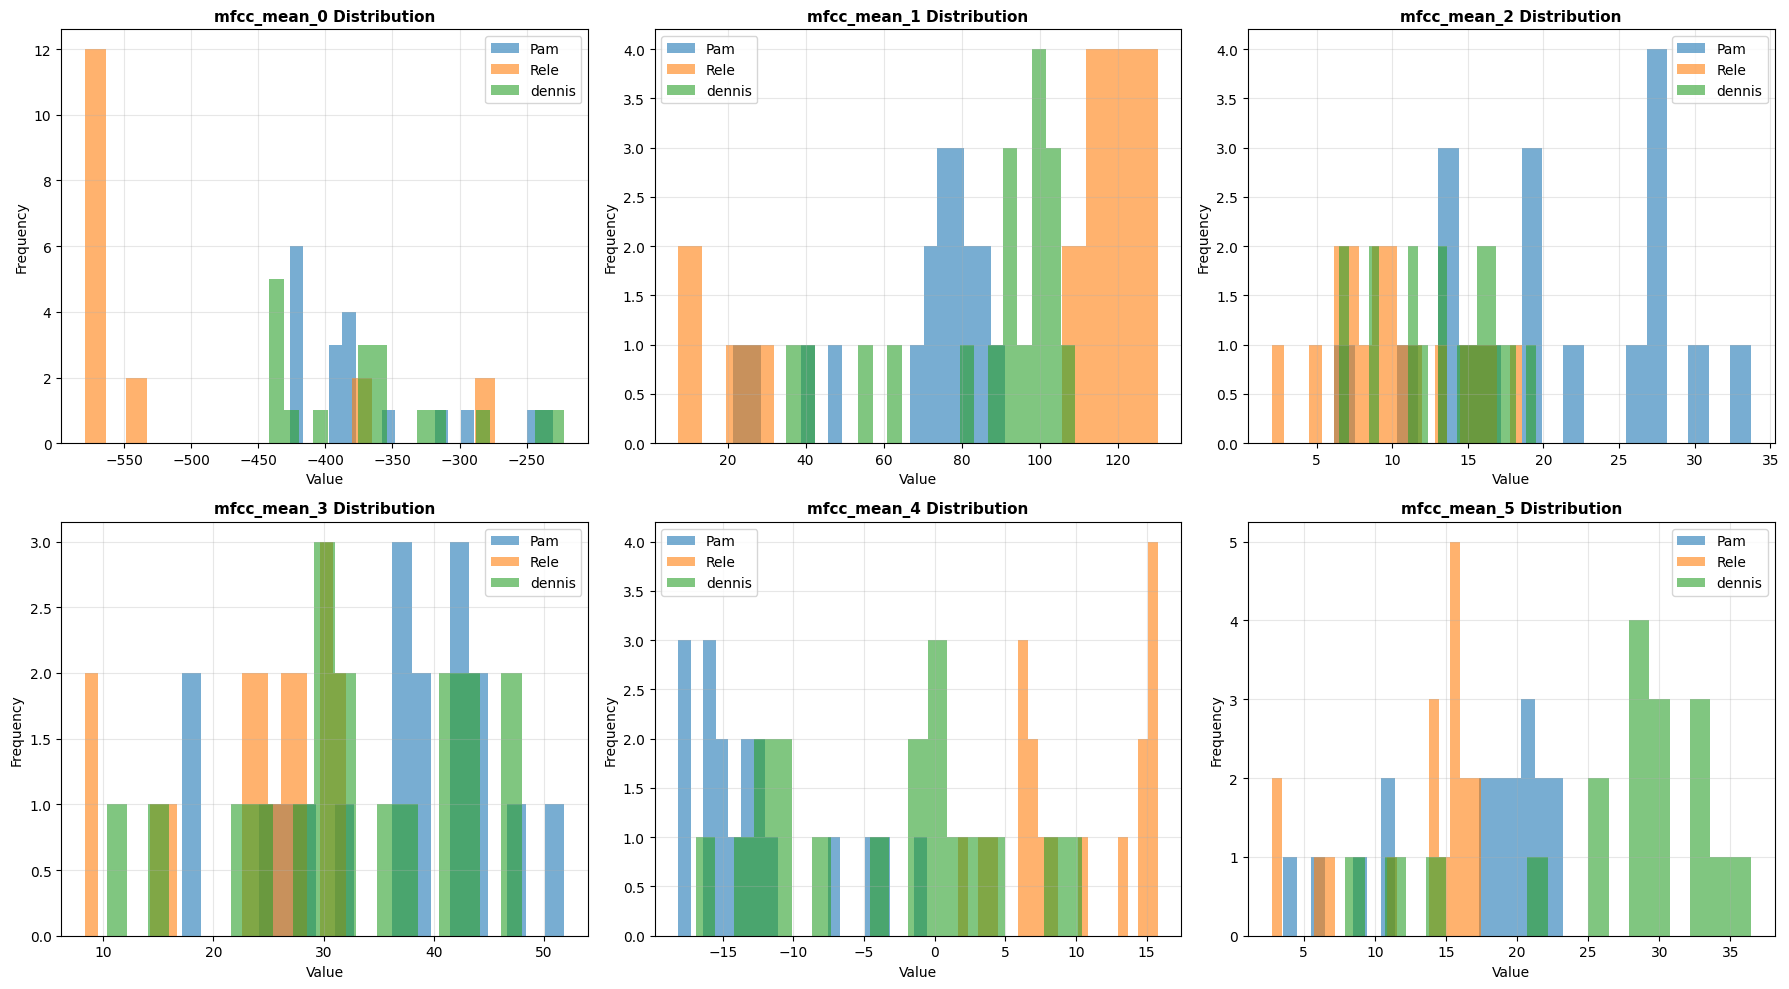

In [11]:
feature_cols = [col for col in df.columns if col not in
               ['file_id', 'speaker', 'audio_name', 'augmentation', 'audio_path']]
mfcc_cols = [col for col in feature_cols if 'mfcc_mean' in col][:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(mfcc_cols):
    for speaker in df['speaker'].unique():
        data = df[df['speaker'] == speaker][feature]
        axes[idx].hist(data, alpha=0.6, label=speaker, bins=20)
    axes[idx].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 8.4 Outlier Detection


Outlier Detection (IQR Method):
mfcc_mean_0: 0 outliers (0.0%)
mfcc_mean_1: 2 outliers (3.7%)
mfcc_mean_2: 1 outliers (1.9%)
mfcc_mean_3: 0 outliers (0.0%)
mfcc_mean_4: 0 outliers (0.0%)
mfcc_mean_5: 0 outliers (0.0%)


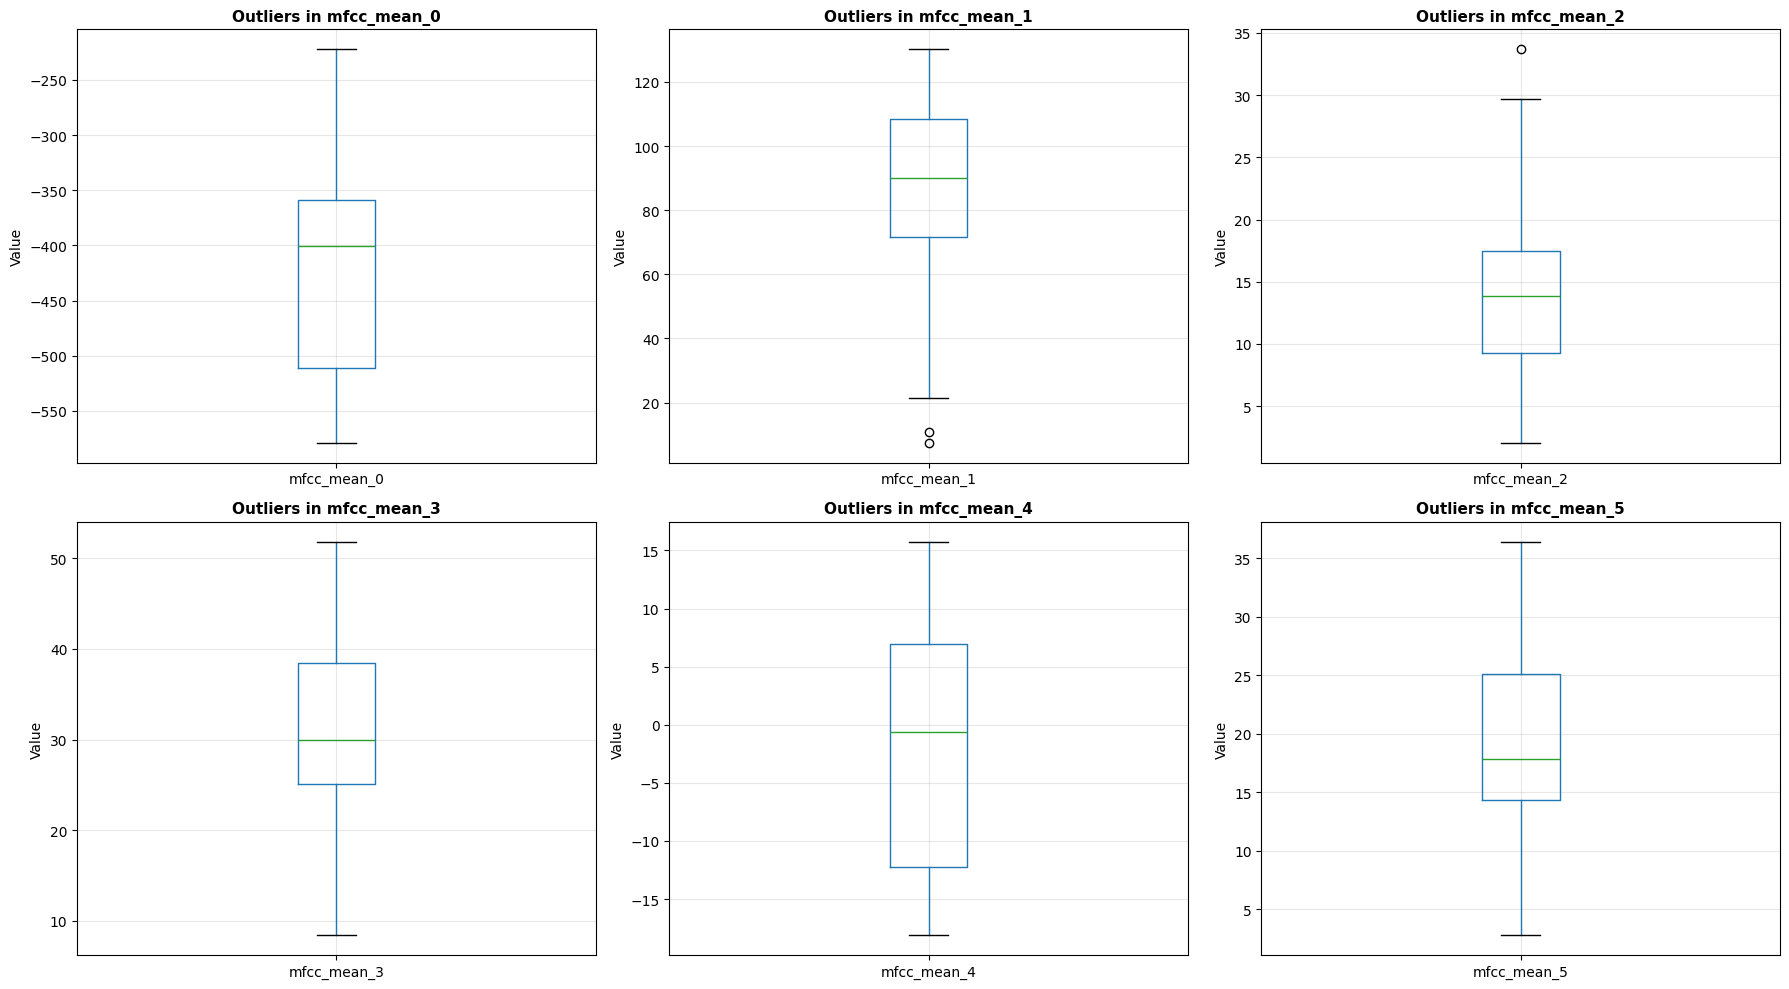

In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_features = mfcc_cols[:6]
outlier_summary = {}

for feature in outlier_features:
    outliers = detect_outliers_iqr(df, feature)
    outlier_summary[feature] = len(outliers)

print("Outlier Detection (IQR Method):")
for feature, count in outlier_summary.items():
    print(f"{feature}: {count} outliers ({count/len(df)*100:.1f}%)")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(outlier_features):
    df.boxplot(column=feature, ax=axes[idx])
    axes[idx].set_title(f'Outliers in {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 8.5 Correlation Matrix


FEATURE CORRELATION ANALYSIS

Total features: 91

  Found 21 highly correlated pairs (≥0.95)
   These features are redundant and can be removed:

   rms_energy_mean ↔ mean_amplitude: 1.000
   rms_energy_std ↔ rms_energy_max: 0.989
   spectral_centroid_mean ↔ zcr_mean: 0.989
   rms_energy_std ↔ max_amplitude: 0.986
   spectral_rolloff_mean ↔ spectral_centroid_mean: 0.986
   rms_energy_max ↔ max_amplitude: 0.983
   spectral_rolloff_mean ↔ spectral_bandwidth_mean: 0.982
   rms_energy_mean ↔ rms_energy_std: 0.980
   rms_energy_std ↔ mean_amplitude: 0.980
   spectral_centroid_mean ↔ spectral_bandwidth_mean: 0.979
   ... and 11 more pairs

 RECOMMENDATION:
   Remove 11 redundant features
   Keep 80 features

CORRELATION HEATMAP (Top 15 Features)


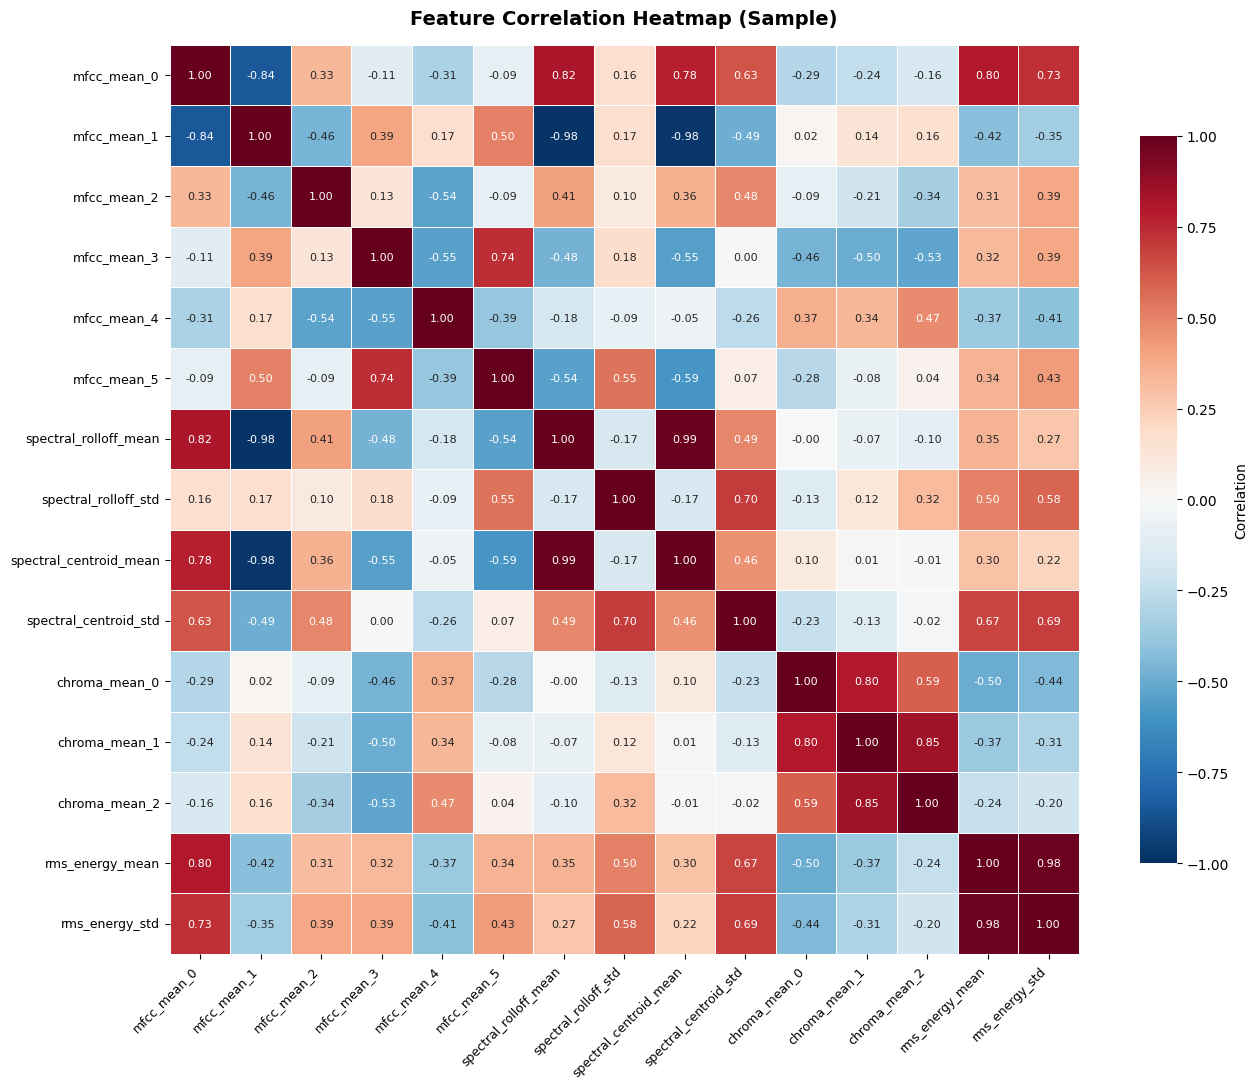

In [13]:
print("=" * 60)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 60)

numeric_features = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
print(f"\nTotal features: {len(numeric_features)}")

corr_matrix_full = df[numeric_features].corr()

correlation_threshold = 0.95
high_corr_pairs = []

for i in range(len(corr_matrix_full.columns)):
    for j in range(i+1, len(corr_matrix_full.columns)):
        corr_value = corr_matrix_full.iloc[i, j]
        if abs(corr_value) >= correlation_threshold:
            high_corr_pairs.append((
                corr_matrix_full.columns[i],
                corr_matrix_full.columns[j],
                corr_value
            ))

if high_corr_pairs:
    print(f"\n  Found {len(high_corr_pairs)} highly correlated pairs (≥{correlation_threshold})")
    print(f"   These features are redundant and can be removed:\n")

    features_to_remove = set([pair[1] for pair in high_corr_pairs])

    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]:
        print(f"   {feat1} ↔ {feat2}: {corr:.3f}")

    if len(high_corr_pairs) > 10:
        print(f"   ... and {len(high_corr_pairs) - 10} more pairs")

    print(f"\n RECOMMENDATION:")
    print(f"   Remove {len(features_to_remove)} redundant features")
    print(f"   Keep {len(numeric_features) - len(features_to_remove)} features")

else:
    print(f"\n No highly correlated pairs found (threshold: {correlation_threshold})")
    features_to_remove = set()

print("\n" + "=" * 60)
print("CORRELATION HEATMAP (Top 15 Features)")
print("=" * 60)

sample_features = []
if 'mfcc_mean_0' in numeric_features:
    sample_features += [f'mfcc_mean_{i}' for i in range(0, min(6, 13)) if f'mfcc_mean_{i}' in numeric_features]
sample_features += [col for col in numeric_features if 'spectral_rolloff' in col][:2]
sample_features += [col for col in numeric_features if 'spectral_centroid' in col][:2]
sample_features += [col for col in numeric_features if 'chroma_mean' in col][:3]
sample_features += [col for col in numeric_features if 'rms_energy' in col][:2]

sample_features = sample_features[:15]

if len(sample_features) > 0:
    corr_matrix = df[sample_features].corr()

    plt.figure(figsize=(14, 11))
    sns.heatmap(corr_matrix,
                annot=True,
                fmt='.2f',
                cmap='RdBu_r',
                center=0,
                vmin=-1, vmax=1,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8, "label": "Correlation"},
                annot_kws={"size": 8})
    plt.title('Feature Correlation Heatmap (Sample)', fontsize=14, fontweight='bold', pad=15)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()

In [14]:
print("=" * 60)
print("IDENTIFYING FEATURES TO REMOVE")
print("=" * 60)

# Get numeric features
numeric_features = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlations
corr_matrix_full = df[numeric_features].corr()

# Find highly correlated pairs (≥0.95)
correlation_threshold = 0.95
high_corr_pairs = []

for i in range(len(corr_matrix_full.columns)):
    for j in range(i+1, len(corr_matrix_full.columns)):
        corr_value = corr_matrix_full.iloc[i, j]
        if abs(corr_value) >= correlation_threshold:
            high_corr_pairs.append((
                corr_matrix_full.columns[i],
                corr_matrix_full.columns[j],
                corr_value
            ))

# Extract features to remove (keep first, remove second)
features_to_remove = list(set([pair[1] for pair in high_corr_pairs]))
features_to_remove.sort()  # Alphabetical order

# Display the list
print(f"\nFound {len(features_to_remove)} features to REMOVE:\n")
for i, feat in enumerate(features_to_remove, 1):
    print(f"  {i:2d}. {feat}")

print(f"\n" + "=" * 60)
print(f"COPY-PASTE READY LIST:")
print("=" * 60)
print("\nfeatures_to_remove = [")
for feat in features_to_remove:
    print(f"    '{feat}',")
print("]")

print(f"\n" + "=" * 60)
print(f"SUMMARY")
print("=" * 60)
print(f"Total features:     {len(numeric_features)}")
print(f"Features to remove: {len(features_to_remove)}")
print(f"Features to keep:   {len(numeric_features) - len(features_to_remove)}")

IDENTIFYING FEATURES TO REMOVE

Found 11 features to REMOVE:

   1. chroma_mean_3
   2. chroma_mean_4
   3. chroma_mean_5
   4. max_amplitude
   5. mean_amplitude
   6. rms_energy_max
   7. rms_energy_std
   8. spectral_bandwidth_mean
   9. spectral_centroid_mean
  10. spectral_rolloff_mean
  11. zcr_mean

COPY-PASTE READY LIST:

features_to_remove = [
    'chroma_mean_3',
    'chroma_mean_4',
    'chroma_mean_5',
    'max_amplitude',
    'mean_amplitude',
    'rms_energy_max',
    'rms_energy_std',
    'spectral_bandwidth_mean',
    'spectral_centroid_mean',
    'spectral_rolloff_mean',
    'zcr_mean',
]

SUMMARY
Total features:     91
Features to remove: 11
Features to keep:   80


### 8.7 Feature Selection Recommendation


FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features (by F-score):
        feature   f_score      p_value
 rms_energy_std 80.465139 1.679259e-16
  max_amplitude 77.975695 3.078908e-16
     mfcc_max_0 66.502977 6.163489e-15
rms_energy_mean 64.030906 1.234422e-14
 mean_amplitude 63.980234 1.252372e-14
 rms_energy_max 60.797446 3.153749e-14
    mfcc_mean_4 58.675759 5.949836e-14
  chroma_mean_2 55.427007 1.623270e-13
  chroma_std_10 46.168011 3.597313e-12
   chroma_std_8 44.915798 5.638803e-12

Bottom 10 Least Important Features (by F-score):
                feature  f_score  p_value
            mfcc_max_12 2.260023 0.114702
             mfcc_max_8 2.117285 0.130816
             mfcc_min_2 2.019848 0.143153
             mfcc_max_7 1.812521 0.173600
spectral_bandwidth_mean 1.727208 0.188016
 spectral_centroid_mean 1.257546 0.293018
             mfcc_std_9 0.970822 0.385661
               zcr_mean 0.487496 0.616995
             mfcc_std_6 0.462403 0.632383
            sample_rate    

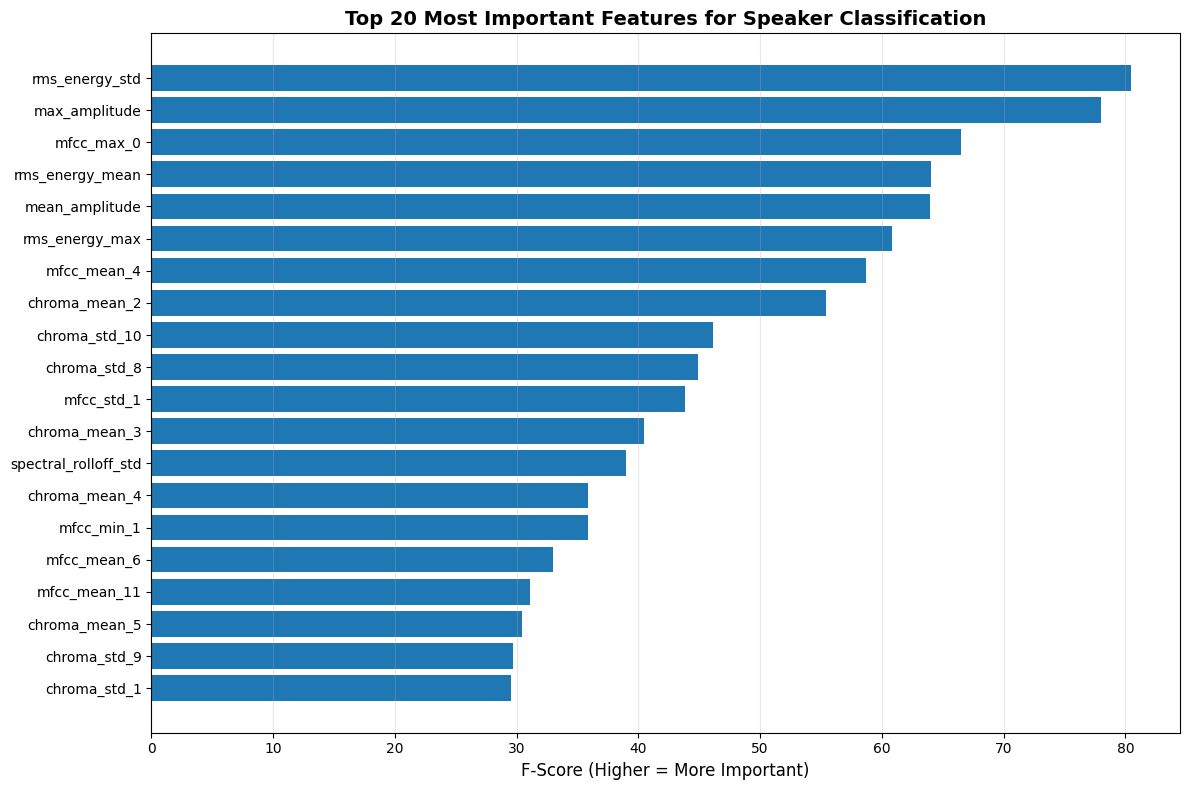


FEATURE REMOVAL RECOMMENDATIONS

1. Remove 11 highly correlated features (redundancy)
   Reason: These features provide almost identical information

2. Consider removing 9 low-importance features
   Reason: These features have minimal impact on classification
   Threshold F-score: 3.20

   Low importance features:
      - mfcc_max_12 (F-score: 2.26)
      - mfcc_max_8 (F-score: 2.12)
      - mfcc_min_2 (F-score: 2.02)
      - mfcc_max_7 (F-score: 1.81)
      - spectral_bandwidth_mean (F-score: 1.73)
      - spectral_centroid_mean (F-score: 1.26)
      - mfcc_std_9 (F-score: 0.97)
      - zcr_mean (F-score: 0.49)
      - mfcc_std_6 (F-score: 0.46)

SUMMARY
Total features: 91
Features to remove (high correlation): 11
Features to consider removing (low importance): 9
Recommended remaining features: 71


In [15]:
from sklearn.feature_selection import f_classif, SelectKBest

print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Prepare data for feature importance
X_temp = df[feature_cols].fillna(df[feature_cols].median())
y_temp = LabelEncoder().fit_transform(df['speaker'])

# Calculate F-statistics (feature importance for classification)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_temp, y_temp)

# Get feature scores
feature_scores = pd.DataFrame({
    'feature': feature_cols,
    'f_score': selector.scores_,
    'p_value': selector.pvalues_
})

# Sort by F-score
feature_scores = feature_scores.sort_values('f_score', ascending=False)

print(f"\nTop 10 Most Important Features (by F-score):")
print(feature_scores.head(10).to_string(index=False))

print(f"\nBottom 10 Least Important Features (by F-score):")
print(feature_scores.tail(10).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_scores.head(20)
plt.barh(range(len(top_features)), top_features['f_score'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('F-Score (Higher = More Important)', fontsize=12)
plt.title('Top 20 Most Important Features for Speaker Classification', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Recommendations for feature removal
print("\n" + "=" * 60)
print("FEATURE REMOVAL RECOMMENDATIONS")
print("=" * 60)

# 1. Remove highly correlated features (redundancy)
if 'features_to_remove' in locals() and len(features_to_remove) > 0:
    print(f"\n1. Remove {len(features_to_remove)} highly correlated features (redundancy)")
    print("   Reason: These features provide almost identical information")

# 2. Consider removing low importance features
low_importance_threshold = feature_scores['f_score'].quantile(0.1)  # Bottom 10%
low_importance_features = feature_scores[feature_scores['f_score'] <= low_importance_threshold]

print(f"\n2. Consider removing {len(low_importance_features)} low-importance features")
print("   Reason: These features have minimal impact on classification")
print(f"   Threshold F-score: {low_importance_threshold:.2f}")
print("\n   Low importance features:")
for feat in low_importance_features['feature'].head(10):
    score = low_importance_features[low_importance_features['feature'] == feat]['f_score'].values[0]
    print(f"      - {feat} (F-score: {score:.2f})")

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print(f"Total features: {len(feature_cols)}")
if 'features_to_remove' in locals() and len(features_to_remove) > 0:
    print(f"Features to remove (high correlation): {len(features_to_remove)}")
    print(f"Features to consider removing (low importance): {len(low_importance_features)}")
    print(f"Recommended remaining features: {len(feature_cols) - len(features_to_remove) - len(low_importance_features)}")
else:
    print("No highly correlated features to remove")
    print(f"Features to consider removing (low importance): {len(low_importance_features)}")


### 8.6 PCA Visualization


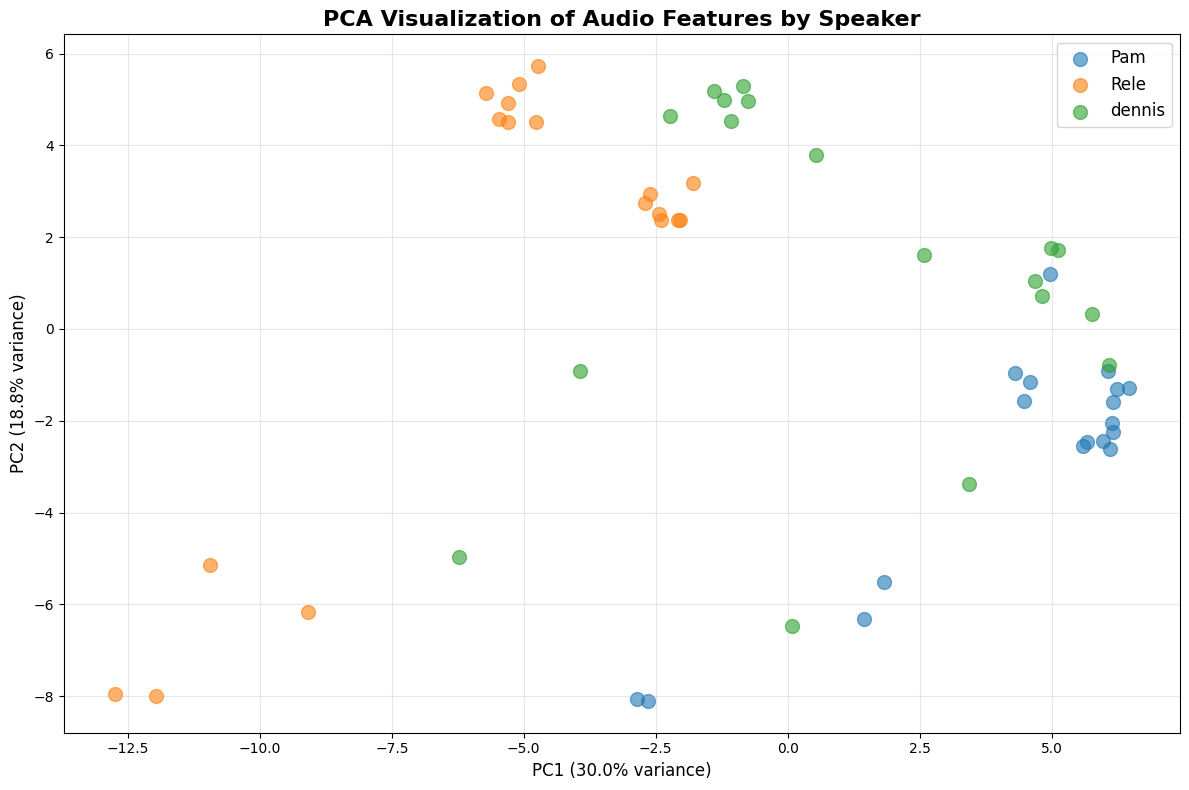

PCA Explained Variance:
  PC1: 30.01%
  PC2: 18.81%


In [16]:
# Prepare data for PCA
X = df[feature_cols].fillna(df[feature_cols].median())
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize
plt.figure(figsize=(12, 8))
for speaker in df['speaker'].unique():
    mask = df['speaker'] == speaker
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=speaker, alpha=0.6, s=100)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Visualization of Audio Features by Speaker', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"PCA Explained Variance:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")


## 9. Data Preprocessing


In [17]:
X = df[feature_cols].copy()
y = df['speaker'].copy()

# Handle missing values
X = X.fillna(X.median())

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("=" * 60)
print("DATA PREPROCESSING - FILE-BASED SPLIT (NO DATA LEAKAGE)")
print("=" * 60)
print(f"Feature columns: {len(feature_cols)}")
print(f"Total samples: {len(X)}")
print(f"Unique audio files: {df['audio_name'].nunique()}")
print(f"Number of speakers: {len(np.unique(y_encoded))}")
print(f"Speakers: {label_encoder.classes_}")

# ⚠️ CRITICAL: Split by audio files to prevent data leakage
# If we split by samples, augmentations from same file could leak into test set
unique_files = df['audio_name'].unique()
print(f"\nUnique audio files: {unique_files}")

# Get speaker for each file (for stratified split by files)
file_speakers = df.groupby('audio_name')['speaker'].first()
print(f"\nFiles per speaker:")
print(file_speakers.value_counts())

# Split files (not samples) to prevent leakage
train_files, test_files = train_test_split(
    unique_files,
    test_size=0.5, # Changed from 0.2 to 0.5 to allow for stratification of 3 classes
    random_state=42,
    stratify=[file_speakers[f] for f in unique_files]
)

print(f"\n✓ FILE-BASED SPLIT:")
print(f"  Training files: {len(train_files)} - {list(train_files)}")
print(f"  Testing files: {len(test_files)} - {list(test_files)}")

# Create masks based on file split
train_mask = df['audio_name'].isin(train_files)
test_mask = df['audio_name'].isin(test_files)

# Split data using file-based masks
X_train = X[train_mask].copy()
X_test = X[test_mask].copy()
y_train = y[train_mask].copy()
y_test = y[test_mask].copy()

# Encode labels (fit on all speakers first to ensure consistency)
label_encoder = LabelEncoder()
label_encoder.fit(df['speaker'].unique())
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify no file overlap (check for leakage)
train_file_set = set(df[train_mask]['audio_name'].unique())
test_file_set = set(df[test_mask]['audio_name'].unique())
overlap = train_file_set & test_file_set

if len(overlap) > 0:
    print(f"\n⚠️  WARNING: Data leakage detected! {len(overlap)} files in both sets!")
else:
    print(f"\n✓ No data leakage: {len(overlap)} files overlap (should be 0)")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ DATA SPLIT COMPLETE:")
print(f"  Training samples: {len(X_train)} (from {len(train_files)} files)")
print(f"  Testing samples: {len(X_test)} (from {len(test_files)} files)")
print(f"  Features: {len(feature_cols)}")
print("\n✓ Data preprocessing completed with file-based split!")

DATA PREPROCESSING - FILE-BASED SPLIT (NO DATA LEAKAGE)
Feature columns: 91
Total samples: 54
Unique audio files: 6
Number of speakers: 3
Speakers: ['Pam' 'Rele' 'dennis']

Unique audio files: ['Pam_Confirm transaction' 'Pam_Yes approve ' 'Rele_Recording_1'
 'Rele_Recording_2' 'dennis_approve' 'dennis_confirm']

Files per speaker:
speaker
Pam       2
Rele      2
dennis    2
Name: count, dtype: int64

✓ FILE-BASED SPLIT:
  Training files: 3 - ['Rele_Recording_1', 'Pam_Yes approve ', 'dennis_confirm']
  Testing files: 3 - ['Rele_Recording_2', 'dennis_approve', 'Pam_Confirm transaction']

✓ No data leakage: 0 files overlap (should be 0)

✓ DATA SPLIT COMPLETE:
  Training samples: 27 (from 3 files)
  Testing samples: 27 (from 3 files)
  Features: 91

✓ Data preprocessing completed with file-based split!


### 10.2 Model Comparison - All Metrics


## 10. Model Training and Evaluation

### 10.1 Train All Models


In [19]:
# Dictionary to store all models and results
models = {}
results = []

def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test, scaled=False):
    """Train and evaluate a model with comprehensive metrics"""
    print(f"\n{'='*60}")
    print(f"TRAINING {model_name.upper()}")
    print(f"{'='*60}")

    # Use scaled or unscaled features
    if scaled:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    # Train model
    model.fit(X_train_use, y_train_encoded)

    # Predictions
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)

    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    loss = log_loss(y_test_encoded, y_pred_proba)

    # Store results
    models[model_name] = model
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Log Loss': loss
    })

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  Log Loss:  {loss:.4f}")

    print(f"\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

    return model, accuracy, precision, recall, f1, loss

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, 'Random Forest', X_train, X_test, y_train, y_test, scaled=False)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')
train_and_evaluate(lr_model, 'Logistic Regression', X_train, X_test, y_train, y_test, scaled=True)

# Train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
train_and_evaluate(svm_model, 'SVM', X_train, X_test, y_train, y_test, scaled=True)

# Train Neural Network
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True)
train_and_evaluate(mlp_model, 'Neural Network', X_train, X_test, y_train, y_test, scaled=True)

# Check if XGBoost is available
try:
    import xgboost
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False

# Train XGBoost (if available)
if XGBOOST_AVAILABLE:
    xgb_model = XGBClassifier(n_estimators=100, max_depth=6, random_state=42, eval_metric='mlogloss')
    train_and_evaluate(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test, scaled=False)
else:
    print("\nSkipping XGBoost (not installed)")


TRAINING RANDOM FOREST

Random Forest Performance:
  Accuracy:  0.6667
  Precision: 0.5000
  Recall:    0.6667
  F1-Score:  0.5556
  Log Loss:  0.7976

Classification Report:
              precision    recall  f1-score   support

         Pam       0.50      1.00      0.67         9
        Rele       1.00      1.00      1.00         9
      dennis       0.00      0.00      0.00         9

    accuracy                           0.67        27
   macro avg       0.50      0.67      0.56        27
weighted avg       0.50      0.67      0.56        27


TRAINING LOGISTIC REGRESSION

Logistic Regression Performance:
  Accuracy:  0.8519
  Precision: 0.8974
  Recall:    0.8519
  F1-Score:  0.8442
  Log Loss:  0.3052

Classification Report:
              precision    recall  f1-score   support

         Pam       0.69      1.00      0.82         9
        Rele       1.00      1.00      1.00         9
      dennis       1.00      0.56      0.71         9

    accuracy                         

In [20]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("=" * 60)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)
print("\nAll Metrics:")
print(results_df.to_string(index=False))

# Find best model for each metric
print("\n" + "=" * 60)
print("BEST MODELS BY METRIC")
print("=" * 60)
print(f"Best Accuracy:  {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} ({results_df['Accuracy'].max():.4f})")
print(f"Best Precision: {results_df.loc[results_df['Precision'].idxmax(), 'Model']} ({results_df['Precision'].max():.4f})")
print(f"Best Recall:    {results_df.loc[results_df['Recall'].idxmax(), 'Model']} ({results_df['Recall'].max():.4f})")
print(f"Best F1-Score:  {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']} ({results_df['F1-Score'].max():.4f})")
print(f"Best Loss:      {results_df.loc[results_df['Log Loss'].idxmin(), 'Model']} ({results_df['Log Loss'].min():.4f})")


COMPREHENSIVE MODEL COMPARISON

All Metrics:
              Model  Accuracy  Precision   Recall  F1-Score  Log Loss
Logistic Regression  0.851852   0.897436 0.851852  0.844156  0.305250
            XGBoost  0.740741   0.773810 0.740741  0.719064  1.234400
                SVM  0.740741   0.854167 0.740741  0.694545  0.758131
      Random Forest  0.666667   0.500000 0.666667  0.555556  0.797623
     Neural Network  0.518519   0.371795 0.518519  0.432900  1.105021

BEST MODELS BY METRIC
Best Accuracy:  Logistic Regression (0.8519)
Best Precision: Logistic Regression (0.8974)
Best Recall:    Logistic Regression (0.8519)
Best F1-Score:  Logistic Regression (0.8442)
Best Loss:      Logistic Regression (0.3052)


### 10.3 Visualization of Model Performance


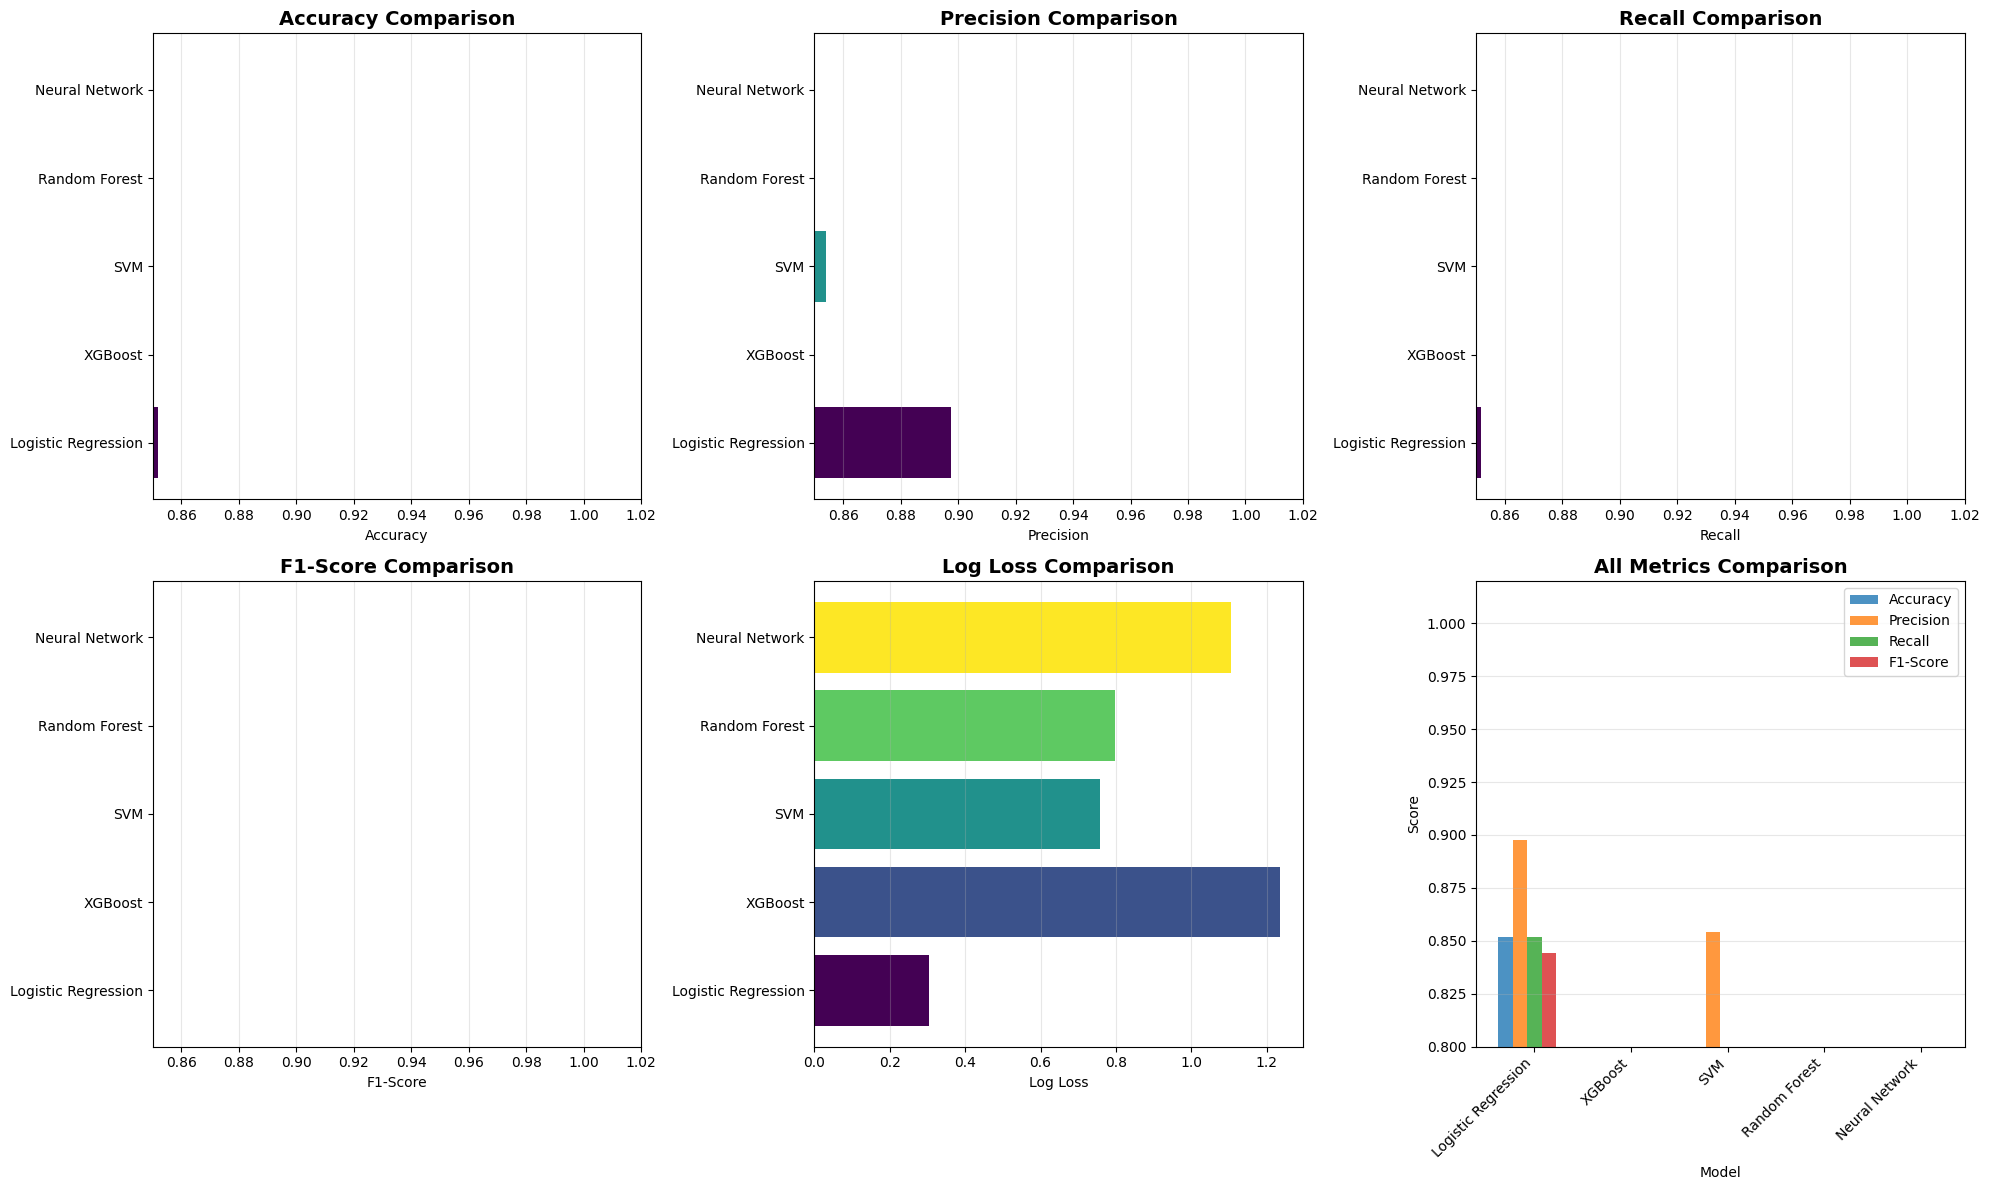

 Model performance visualizations created


In [21]:
# Create visualization comparing all metrics
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Accuracy comparison
axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_xlim([0.85, 1.02])
axes[0, 0].grid(axis='x', alpha=0.3)

# Precision comparison
axes[0, 1].barh(results_df['Model'], results_df['Precision'], color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))
axes[0, 1].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Precision')
axes[0, 1].set_xlim([0.85, 1.02])
axes[0, 1].grid(axis='x', alpha=0.3)

# Recall comparison
axes[0, 2].barh(results_df['Model'], results_df['Recall'], color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))
axes[0, 2].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Recall')
axes[0, 2].set_xlim([0.85, 1.02])
axes[0, 2].grid(axis='x', alpha=0.3)

# F1-Score comparison
axes[1, 0].barh(results_df['Model'], results_df['F1-Score'], color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))
axes[1, 0].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('F1-Score')
axes[1, 0].set_xlim([0.85, 1.02])
axes[1, 0].grid(axis='x', alpha=0.3)

# Log Loss comparison (lower is better)
axes[1, 1].barh(results_df['Model'], results_df['Log Loss'], color=plt.cm.viridis(np.linspace(0, 1, len(results_df))))
axes[1, 1].set_title('Log Loss Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Log Loss')
axes[1, 1].grid(axis='x', alpha=0.3)

# Combined metrics radar-like view
x = np.arange(len(results_df['Model']))
width = 0.15
axes[1, 2].bar(x - 2*width, results_df['Accuracy'], width, label='Accuracy', alpha=0.8)
axes[1, 2].bar(x - width, results_df['Precision'], width, label='Precision', alpha=0.8)
axes[1, 2].bar(x, results_df['Recall'], width, label='Recall', alpha=0.8)
axes[1, 2].bar(x + width, results_df['F1-Score'], width, label='F1-Score', alpha=0.8)
axes[1, 2].set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Model')
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)
axes[1, 2].set_ylim([0.8, 1.02])

plt.tight_layout()
plt.show()
print(" Model performance visualizations created")
